## 5. Data Visualization

### 5.2. Plot Bar Chart by Matplotlib

In [ ]:
grouped = df4.groupby('T')
fig, axs = plt.subplots(figsize=(20,10), 
                        nrows = 3, ncols = 3,   
                        gridspec_kw = dict(wspace = 0.3, hspace = 0.3))

In [ ]:
cmap = plt.cm.rainbow
targets = zip(grouped.groups.keys(), axs.flatten())

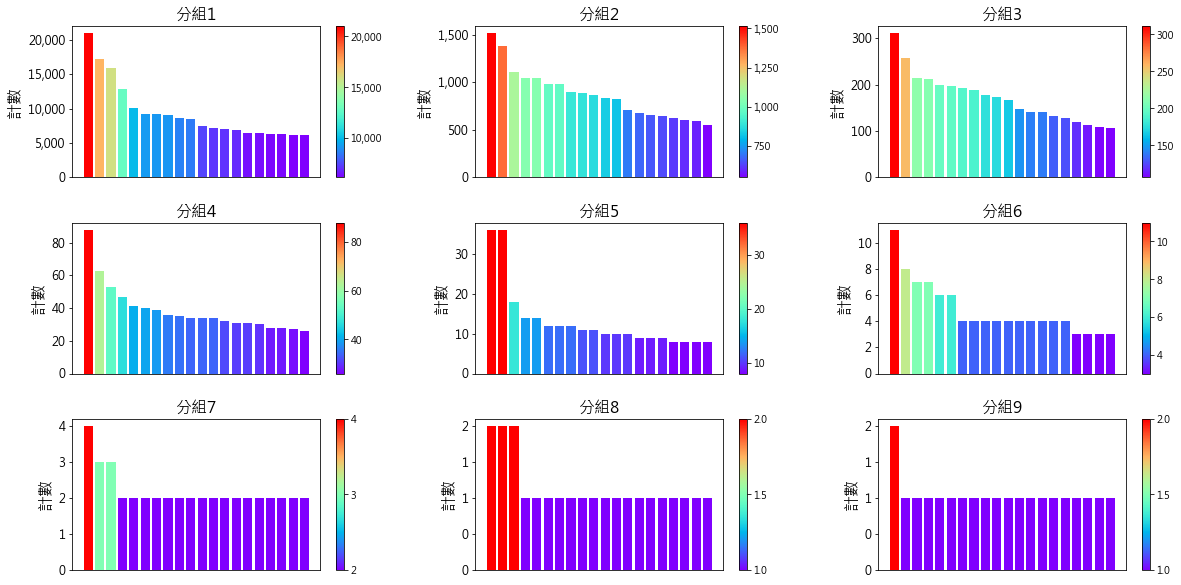

In [11]:
for i, (key, ax) in enumerate(targets):
    
    if key > 8:
    break
    
    norm = matplotlib.colors.Normalize(vmin=grouped.get_group(key)['S'].values.min(), 
                                       vmax=grouped.get_group(key)['S'].values.max())
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    
    ax.bar(grouped.get_group(key)['R'], grouped.get_group(key)['S'], 
           color = cmap(norm(grouped.get_group(key)['S'].values)))
    
    ax.set_title('分組%d'% (key+1), fontsize=16)
    ax.set_ylabel('計數', fontsize=16)
    
    if key < 6:
        comma_fmt = FuncFormatter(lambda x, p: format(int(x), ','))
        fig.colorbar(sm, ax=ax, ticks=ax.get_yticks(), format=comma_fmt)
    else:
        fig.colorbar(sm, ax=ax, ticks=ax.get_yticks())
        
    ax.xaxis.set_visible(False)
    
    ax.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    ax.tick_params(axis='y', which='major', labelsize=12)    
    
plt.show()       